In [46]:
import pandas as pd
import panel as pn
from pathlib import Path
import hvplot.pandas
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
real_gdp_per_capita_path = Path("Resources/Real_GDP_per_captia.csv")
real_gdp_per_capita      = pd.read_csv(real_gdp_per_capita_path,index_col='DATE', parse_dates=True, infer_datetime_format=True)
real_gdp_per_capita      = real_gdp_per_capita.rename(columns={"A939RX0Q048SBEA": "GDP"})
real_gdp_per_capita_change= real_gdp_per_capita.pct_change()
real_gdp_per_capita_change.dropna(inplace=True)

interest_rate_path = Path("Resources/Interest rate.csv")
interest_rate      = pd.read_csv(interest_rate_path,index_col='observation_date', parse_dates=True, infer_datetime_format=True)
interest_rate      = interest_rate.rename(columns={"DFF": "Interest Rate"})
interest_rate_change= interest_rate.pct_change()
interest_rate_change.dropna(inplace=True)


SP_500 = yf.download('^GSPC',
start='1980-01-01',
end='2021-01-29',
progress=False)

# Display sample data
SP_500.drop(columns= {'Open','High','Low','Adj Close','Volume'},inplace =True)
SP_500_daily_returns=SP_500.pct_change().rename(columns={"Close": "S&P_500"})
SP_500_daily_returns.dropna(inplace=True)



In [48]:
df_combine_pct = pd.concat([real_gdp_per_capita_change,SP_500_daily_returns,interest_rate_change], axis = "columns",join = "inner")
df_combine_pct.head()

GDP   S&P_500  Interest Rate
1980-04-01 -0.023314  0.000882      -0.003023
1980-07-01 -0.004176  0.006040      -0.092912
1980-10-01  0.015889  0.013311      -0.010614
1981-04-01 -0.009665  0.004191      -0.008202
1981-07-01  0.009226 -0.010975       0.131438

In [49]:
correlation = df_combine_pct.corr()
correlation

GDP   S&P_500  Interest Rate
GDP            1.000000  0.281477       0.094598
S&P_500        0.281477  1.000000      -0.079000
Interest Rate  0.094598 -0.079000       1.000000

<AxesSubplot:>

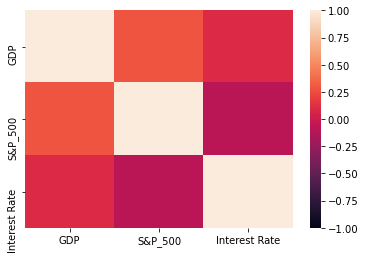

In [50]:
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:>

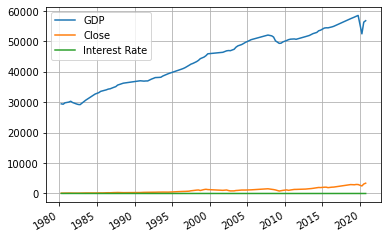

In [53]:
df_combine.plot(y=['GDP','Close','Interest Rate'],grid=True)